# 1 - Importing Libraries

In [ ]:
pip install ../.. --upgrade --no-cache-dir

In [3]:
import copy
import nnetsauce as ns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, fetch_california_housing, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, SGDRegressor, PassiveAggressiveRegressor, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# 2 - Regression Models

## 2 - 1 - Ridge Regression

,0,1,2,3,4,5,6,7,8,9
0,6.72,-183.96,467.62,268.35,-89.98,-79.05,-183.39,153.99,383.78,124.99
1,6.72,-183.96,467.62,268.35,-89.98,-79.05,-183.39,153.99,383.78,124.99
2,6.72,-183.96,467.62,268.35,-89.98,-79.05,-183.40,153.99,383.78,124.99
3,6.72,-183.96,467.62,268.35,-89.98,-79.05,-183.40,153.99,383.78,124.99


,0
0,53.45
1,53.75
2,53.99
3,54.24
4,54.32


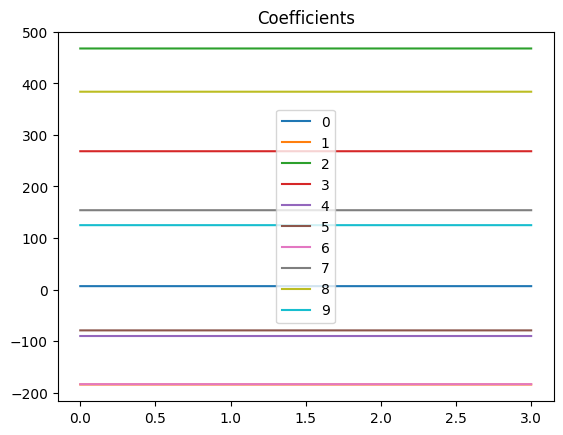

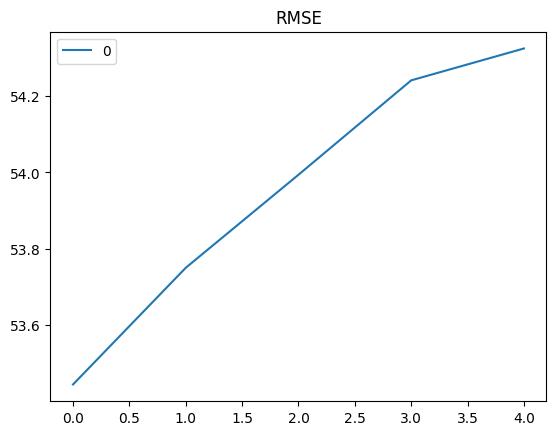

,0,1,2,3,4,5,6,7
0,0.44,0.01,-0.11,0.64,-0.00,-0.00,-0.42,-0.43
1,0.44,0.01,-0.11,0.64,-0.02,-0.00,-0.42,-0.43
2,0.44,0.01,-0.11,0.64,0.03,-0.00,-0.42,-0.43
3,0.44,0.01,-0.11,0.64,-0.21,-0.00,-0.42,-0.42


,0
0,32.90
1,39.78
2,62.75
3,382.85
4,213.75


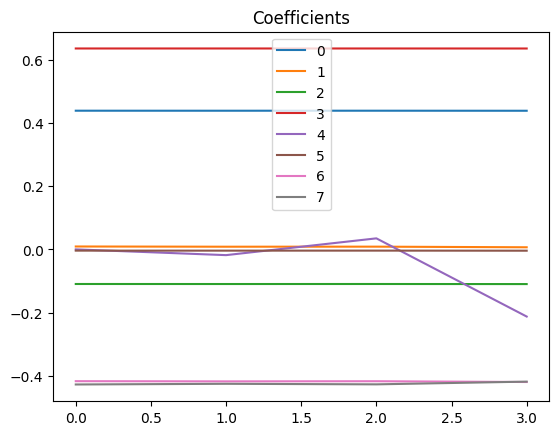

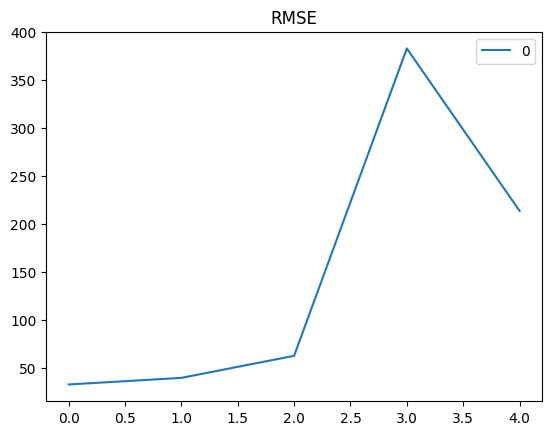

In [4]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = RidgeCV()

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[0, :], y_test[0])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[1:]) - y_test[1:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[1, :], y_test[1])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[2:]) - y_test[2:])**2)))
    regr_upd.partial_fit(X_test[2, :], y_test[2])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[3:]) - y_test[3:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[3, :], y_test[3])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[4:]) - y_test[4:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[4, :], y_test[4])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[5:]) - y_test[5:])**2)))

    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()

## 2 - 2 - Passive Aggressive Regression

,0,1,2,3,4,5,6,7,8,9
0,41.86,-57.02,296.61,229.31,8.05,-9.76,-212.33,159.25,266.33,159.85
1,41.86,-57.02,296.61,229.31,8.05,-9.76,-212.33,159.25,266.33,159.85
2,41.86,-57.02,296.61,229.31,8.05,-9.76,-212.33,159.25,266.34,159.85
3,41.86,-57.02,296.61,229.31,8.05,-9.76,-212.33,159.25,266.33,159.85


,0
0,57.90
1,58.22
2,58.33
3,58.47
4,58.58


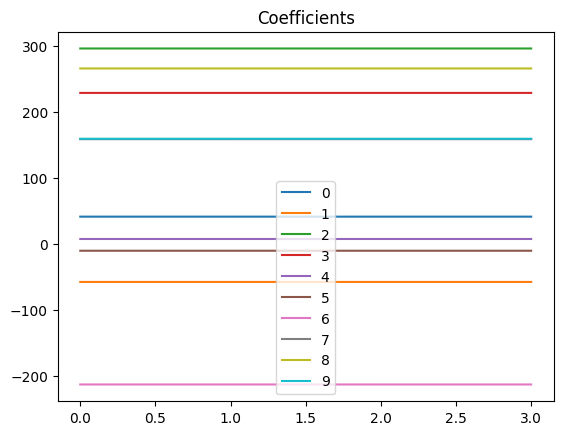

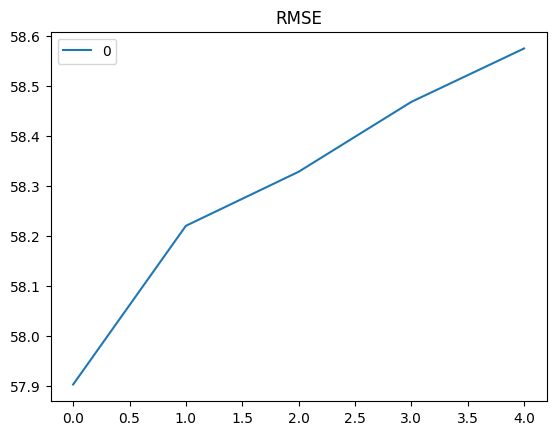

,0,1,2,3,4,5,6,7
0,0.28,0.01,0.02,-0.05,-0.00,-0.08,-0.14,-0.05
1,0.28,0.01,0.02,-0.05,0.00,-0.08,-0.14,-0.05
2,0.28,0.01,0.02,-0.05,0.00,-0.08,-0.14,-0.05
3,0.28,0.01,0.02,-0.05,-0.00,-0.08,-0.14,-0.05


,0
0,1.21
1,1.54
2,1.72
3,4.74
4,1.15


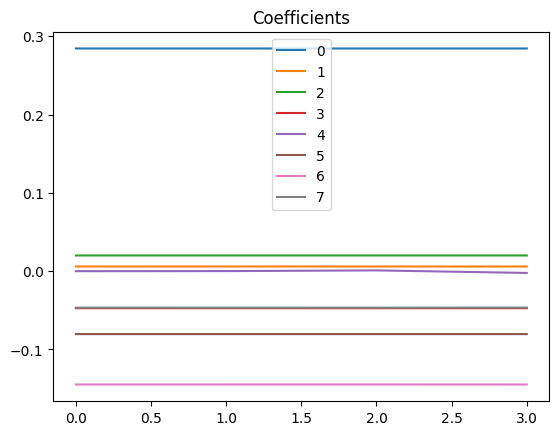

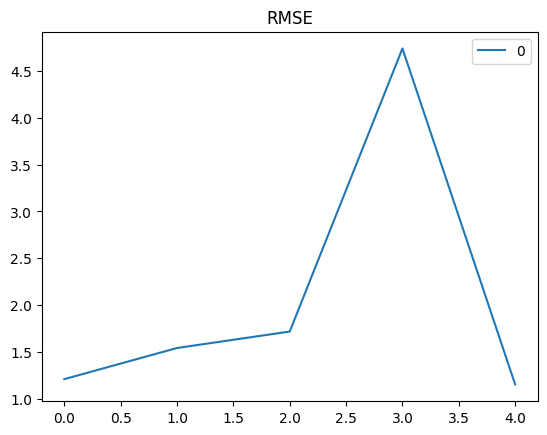

In [5]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = PassiveAggressiveRegressor()

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[0, :], y_test[0])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[1:]) - y_test[1:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[1, :], y_test[1])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[2:]) - y_test[2:])**2)))
    regr_upd.partial_fit(X_test[2, :], y_test[2])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[3:]) - y_test[3:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[3, :], y_test[3])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[4:]) - y_test[4:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[4, :], y_test[4])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[5:]) - y_test[5:])**2)))

    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()

## 2 - 3 - Lasso Regression

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-3.68,-12.30,22.41,9.12,-53.20,27.47,8.73,7.91,32.61,-0.60,0.55,-0.55,29.18,-19.02,-15.67,10.45,17.22
1,-3.68,-12.27,22.41,9.12,-53.21,27.46,8.73,7.91,32.63,-0.61,0.58,-0.58,29.17,-19.01,-15.69,10.46,17.21
2,-3.66,-12.27,22.42,9.13,-53.21,27.46,8.70,7.94,32.66,-0.57,0.63,-0.63,29.18,-19.00,-15.69,10.47,17.22
3,-3.69,-12.29,22.44,9.12,-53.23,27.45,8.70,7.94,32.65,-0.60,0.60,-0.60,29.16,-19.02,-15.71,10.45,17.20
4,-3.67,-12.27,22.43,9.14,-53.23,27.45,8.69,7.94,32.66,-0.61,0.62,-0.62,29.16,-19.01,-15.72,10.46,17.19


,0
0,51.59
1,51.87
2,52.15
3,52.42
4,52.50


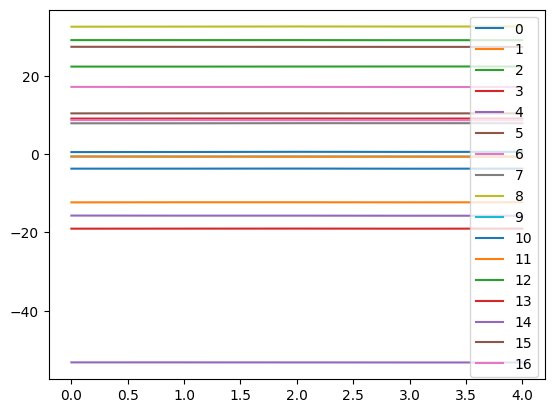

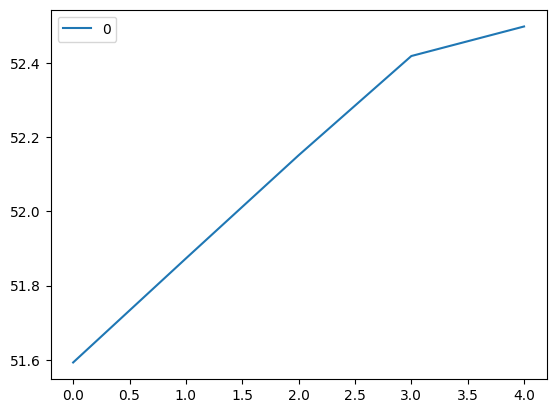

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
1,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
2,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
3,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08


,0
0,0.72
1,0.72
2,0.72
3,0.72
4,0.72


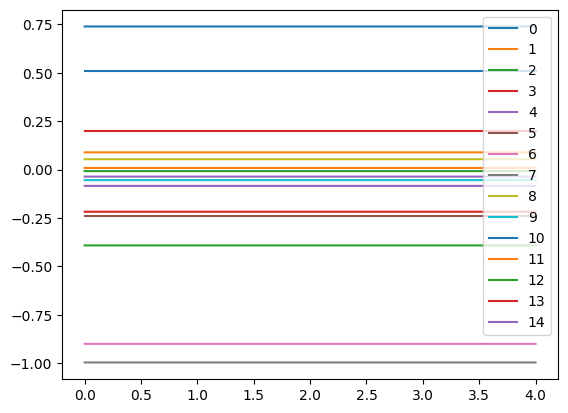

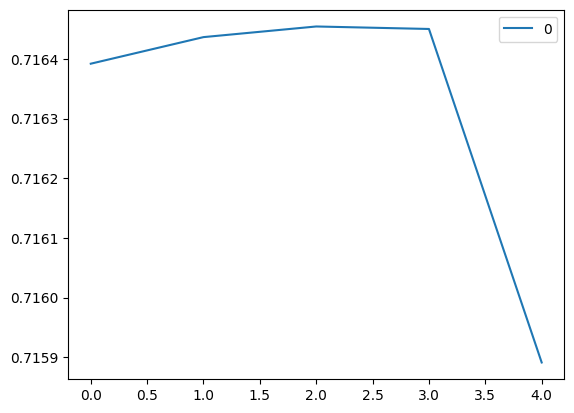

In [6]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = ns.CustomRegressor(RidgeCV())

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[0, :], y_test[0])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[1:]) - y_test[1:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[1, :], y_test[1])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[2:]) - y_test[2:])**2)))
    regr_upd.partial_fit(X_test[2, :], y_test[2])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[3:]) - y_test[3:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[3, :], y_test[3])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[4:]) - y_test[4:])**2)))   
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[4, :], y_test[4])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[5:]) - y_test[5:])**2)))
    coeffs.append(regr_upd.coef_)

    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.show()
    df_rmses.plot()
    plt.show()

## 2 - 4 - Passive Aggressive Regression

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.16,-22.09,25.85,8.60,-30.06,4.79,-0.80,7.71,27.39,6.97,-0.63,0.63,14.01,-2.12,2.80,-4.22,18.68
1,-0.15,-22.06,25.85,8.60,-30.06,4.78,-0.80,7.70,27.42,6.96,-0.60,0.60,14.01,-2.11,2.78,-4.21,18.66
2,-0.14,-22.05,25.86,8.60,-30.07,4.78,-0.84,7.74,27.44,6.99,-0.55,0.55,14.01,-2.10,2.78,-4.21,18.67
3,-0.17,-22.07,25.88,8.59,-30.08,4.77,-0.84,7.73,27.43,6.96,-0.58,0.58,13.99,-2.13,2.76,-4.23,18.65


,0
0,53.08
1,53.34
2,53.63
3,53.89
4,54.18


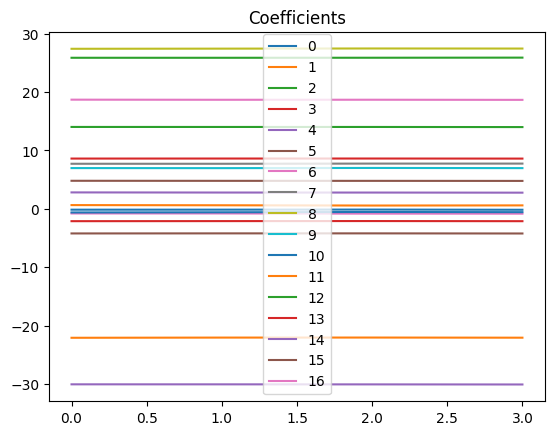

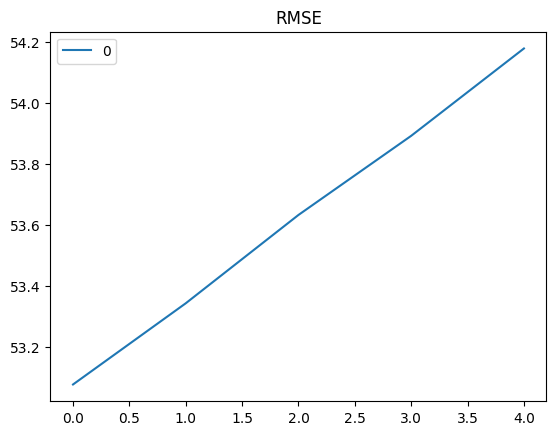

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.56,-0.25,-0.52,1.11,-0.03,-3.35,-0.96,-0.77,0.03,-0.03,-0.15,0.35,0.20,0.19,0.33
1,0.56,-0.25,-0.52,1.11,-0.03,-3.35,-0.96,-0.77,0.03,-0.03,-0.15,0.35,0.20,0.19,0.33
2,0.56,-0.25,-0.52,1.11,-0.03,-3.35,-0.96,-0.77,0.03,-0.03,-0.15,0.35,0.20,0.19,0.33
3,0.56,-0.25,-0.52,1.11,-0.03,-3.35,-0.96,-0.77,0.03,-0.03,-0.15,0.35,0.20,0.19,0.33


,0
0,2.92
1,2.92
2,2.92
3,2.92
4,2.92


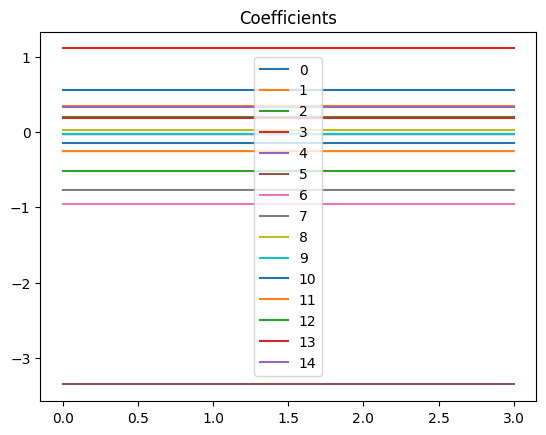

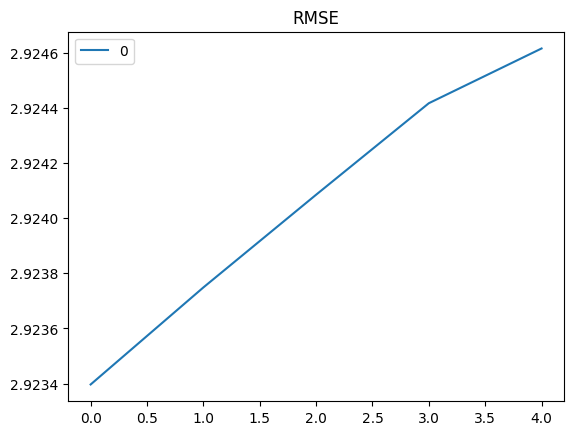

In [7]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = ns.CustomRegressor(PassiveAggressiveRegressor())

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[0, :], y_test[0])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[1:]) - y_test[1:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[1, :], y_test[1])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[2:]) - y_test[2:])**2)))
    regr_upd.partial_fit(X_test[2, :], y_test[2])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[3:]) - y_test[3:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[3, :], y_test[3])    
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[4:]) - y_test[4:])**2)))
    coeffs.append(regr_upd.coef_)
    regr_upd.partial_fit(X_test[4, :], y_test[4])
    rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[5:]) - y_test[5:])**2)))

    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()

## 2 - 5 - Regression loop

100%|██████████| 88/88 [00:00<00:00, 372.09it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-3.68,-12.30,22.41,9.12,-53.20,27.47,8.73,7.91,32.61,-0.60,0.55,-0.55,29.18,-19.02,-15.67,10.45,17.22
1,-3.65,-12.00,22.40,9.17,-53.22,27.38,8.72,7.90,32.84,-0.69,0.83,-0.83,29.15,-18.91,-15.88,10.56,17.05
2,-3.69,-11.73,22.30,8.99,-53.33,27.45,8.35,8.27,32.84,-0.59,1.08,-1.08,29.02,-18.93,-16.07,10.36,16.96
3,-3.44,-11.97,22.52,9.24,-53.28,27.33,8.39,8.20,33.19,-0.29,1.34,-1.34,29.19,-18.80,-15.87,10.62,17.17
4,-3.80,-12.23,22.72,9.11,-53.45,27.22,8.36,8.18,33.05,-0.61,1.07,-1.07,28.98,-19.03,-16.07,10.41,16.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-3.91,-13.81,22.26,8.77,-51.15,28.96,10.75,6.95,33.08,-3.57,1.73,-1.73,29.23,-18.71,-15.72,11.34,16.23
85,-3.83,-13.95,22.61,8.97,-51.10,28.85,10.67,7.01,33.40,-3.50,1.88,-1.88,29.39,-18.58,-15.55,11.53,16.40
86,-3.60,-13.68,22.67,9.18,-50.81,29.10,10.70,7.00,33.64,-3.51,2.13,-2.13,29.72,-18.19,-15.33,11.97,16.61
87,-3.40,-13.82,22.73,9.25,-50.78,29.17,10.59,7.10,33.71,-3.48,2.28,-2.28,29.75,-18.16,-15.29,11.98,16.71


,0
0,51.59
1,51.87
2,52.15
3,52.42
4,52.50
...,...
83,53.03
84,57.44
85,55.87
86,65.64


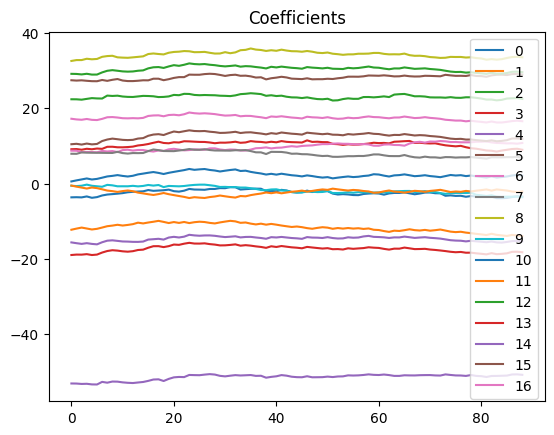

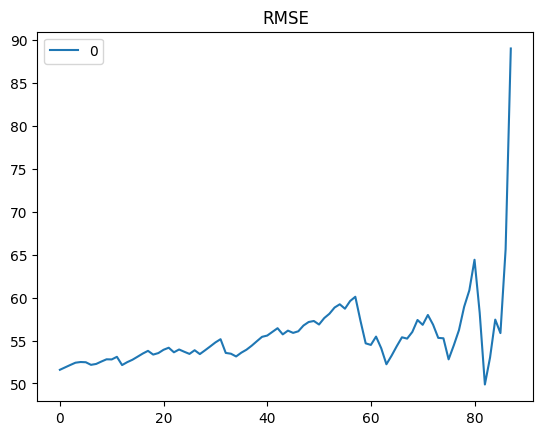

100%|██████████| 4127/4127 [00:21<00:00, 189.97it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
1,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
2,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
3,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4124,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4125,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4126,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08


,0
0,0.72
1,0.72
2,0.72
3,0.72
4,0.72
...,...
4122,0.52
4123,0.34
4124,0.39
4125,0.45


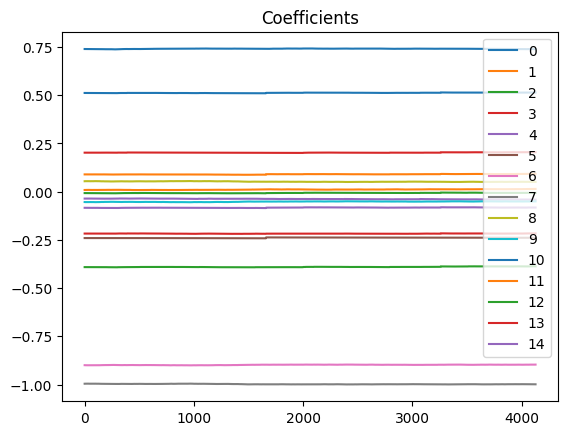

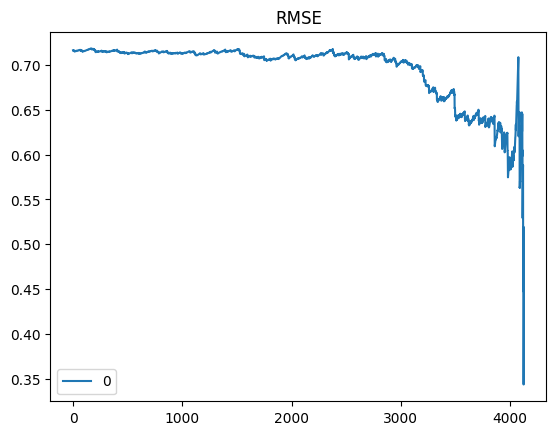

In [8]:
from tqdm import tqdm

alpha = 0.1

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = ns.CustomRegressor(RidgeCV())

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    
    for i in tqdm(range(X_test.shape[0] - 1)):
        regr_upd.partial_fit(X_test[i, :], y_test[i])
        rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[(i + 1):]) - y_test[(i + 1):])**2)))
        coeffs.append(regr_upd.coef_)
    
    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()

100%|██████████| 88/88 [00:00<00:00, 509.56it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-3.68,-12.30,22.41,9.12,-53.20,27.47,8.73,7.91,32.61,-0.60,0.55,-0.55,29.18,-19.02,-15.67,10.45,17.22
1,-3.68,-12.27,22.41,9.12,-53.21,27.46,8.73,7.91,32.63,-0.61,0.58,-0.58,29.17,-19.01,-15.69,10.46,17.21
2,-3.68,-12.24,22.40,9.11,-53.22,27.47,8.70,7.95,32.63,-0.60,0.60,-0.60,29.16,-19.01,-15.71,10.44,17.20
3,-3.66,-12.27,22.42,9.13,-53.21,27.46,8.70,7.94,32.66,-0.57,0.63,-0.63,29.18,-19.00,-15.69,10.47,17.22
4,-3.69,-12.29,22.44,9.12,-53.23,27.45,8.70,7.94,32.65,-0.60,0.60,-0.60,29.16,-19.02,-15.71,10.45,17.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-3.63,-12.39,22.47,9.18,-52.92,27.69,8.88,7.91,32.74,-0.83,0.77,-0.77,29.30,-18.87,-15.57,10.66,17.24
85,-3.62,-12.40,22.50,9.20,-52.92,27.68,8.88,7.91,32.77,-0.82,0.78,-0.78,29.32,-18.86,-15.56,10.68,17.25
86,-3.60,-12.37,22.50,9.22,-52.89,27.71,8.88,7.91,32.79,-0.82,0.81,-0.81,29.35,-18.82,-15.54,10.72,17.27
87,-3.58,-12.39,22.51,9.22,-52.89,27.71,8.87,7.92,32.80,-0.82,0.82,-0.82,29.35,-18.82,-15.54,10.72,17.28


,0
0,51.59
1,51.87
2,52.15
3,52.42
4,52.50
...,...
83,53.03
84,57.44
85,55.87
86,65.64


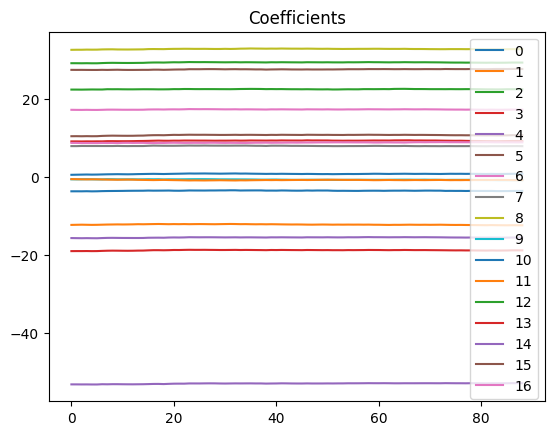

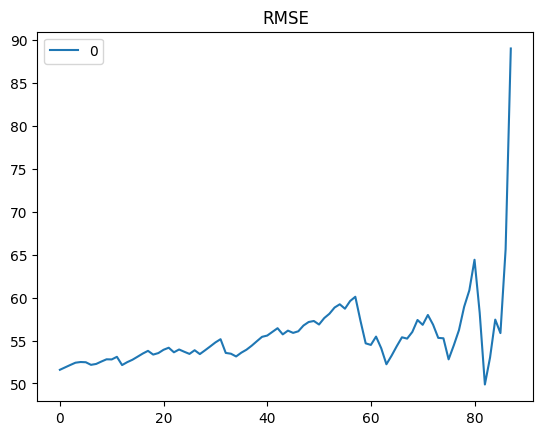

100%|██████████| 4127/4127 [00:31<00:00, 131.33it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
1,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
2,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
3,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4124,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4125,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08
4126,0.74,0.01,-0.39,0.20,-0.04,-0.24,-0.90,-1.00,0.05,-0.05,0.51,0.09,-0.01,-0.22,-0.08


,0
0,0.72
1,0.72
2,0.72
3,0.72
4,0.72
...,...
4122,0.52
4123,0.34
4124,0.39
4125,0.45


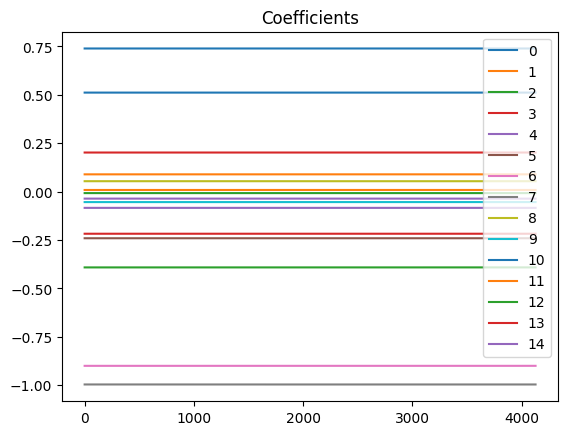

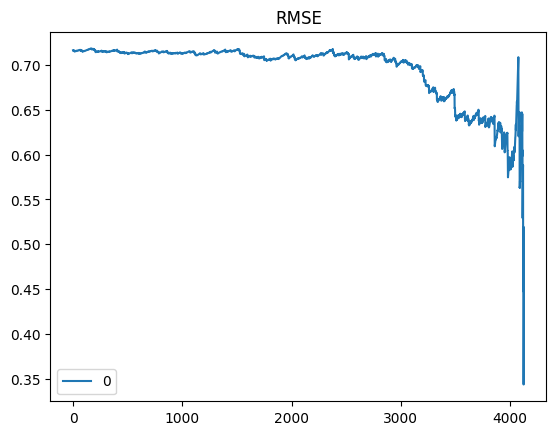

In [9]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = ns.CustomRegressor(RidgeCV())

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    
    for i in tqdm(range(X_test.shape[0] - 1)):
        regr_upd.partial_fit(X_test[i, :], y_test[i])
        rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[(i + 1):]) - y_test[(i + 1):])**2)))
        coeffs.append(regr_upd.coef_)
    
    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()

100%|██████████| 88/88 [00:00<00:00, 5787.70it/s]


,0,1,2,3,4,5,6,7,8,9
0,-6.19,-225.23,505.20,295.61,-826.05,466.91,130.75,252.95,691.08,111.21
1,-6.18,-225.23,505.20,295.61,-826.05,466.91,130.75,252.95,691.08,111.21
2,-6.19,-225.23,505.20,295.61,-826.05,466.91,130.74,252.96,691.08,111.21
3,-6.18,-225.23,505.20,295.61,-826.05,466.91,130.74,252.96,691.09,111.21
4,-6.19,-225.23,505.20,295.61,-826.05,466.91,130.74,252.96,691.08,111.21
...,...,...,...,...,...,...,...,...,...,...
84,-6.18,-225.24,505.20,295.61,-826.04,466.92,130.75,252.95,691.09,111.20
85,-6.18,-225.24,505.21,295.62,-826.04,466.92,130.75,252.96,691.09,111.20
86,-6.18,-225.24,505.21,295.62,-826.04,466.92,130.75,252.96,691.09,111.20
87,-6.18,-225.24,505.21,295.62,-826.04,466.92,130.75,252.96,691.09,111.20


,0
0,52.43
1,52.73
2,53.00
3,53.27
4,53.32
...,...
83,50.07
84,54.57
85,48.26
86,56.08


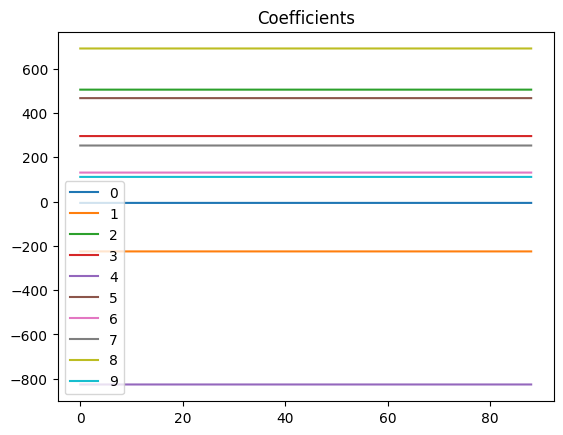

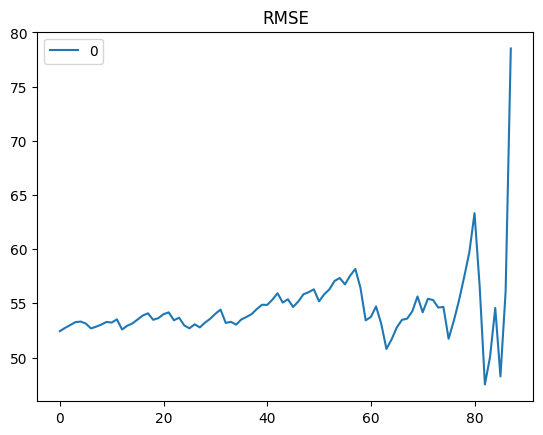

100%|██████████| 4127/4127 [00:01<00:00, 3164.03it/s]


,0,1,2,3,4,5,6,7
0,0.44,0.01,-0.11,0.65,-0.00,-0.00,-0.42,-0.43
1,0.44,0.01,-0.11,0.65,-0.02,-0.00,-0.42,-0.43
2,0.44,0.01,-0.11,0.65,-0.02,-0.00,-0.42,-0.43
3,0.44,0.01,-0.11,0.65,0.03,-0.00,-0.42,-0.43
4,0.44,0.01,-0.11,0.65,-0.21,-0.00,-0.42,-0.42
...,...,...,...,...,...,...,...,...
4123,0.56,-0.04,-0.16,0.64,-0.01,0.13,-0.81,0.15
4124,0.56,-0.04,-0.16,0.64,0.01,0.13,-0.81,0.15
4125,0.56,-0.04,-0.16,0.64,0.02,0.13,-0.81,0.15
4126,0.56,-0.04,-0.16,0.64,0.03,0.13,-0.81,0.14


,0
0,32.93
1,39.81
2,62.80
3,383.21
4,213.96
...,...
4122,101.18
4123,67.98
4124,65.80
4125,56.01


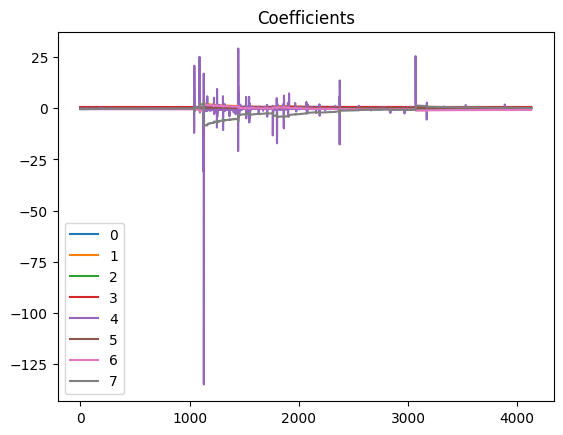

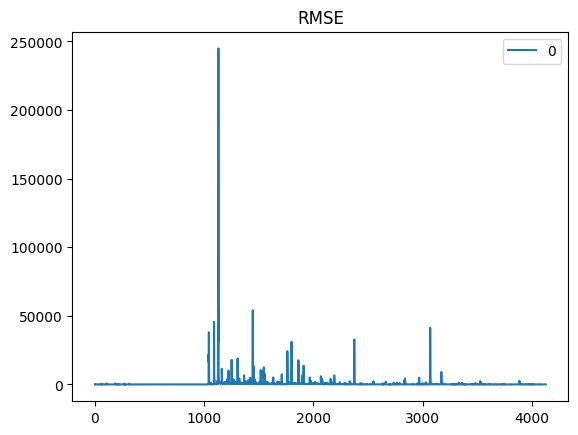

In [10]:
alpha = 0.5

# load data
for dataset in [load_diabetes, fetch_california_housing]:

    coeffs = []
    rmses = []

    model = LinearRegression()

    X, y = dataset(return_X_y=True)
    #X = StandardScaler().fit_transform(X)
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    # fit a linear regression model
    regr = model.fit(X_train, y_train)
    # update the linear regression model
    regr_upd = ns.RegressorUpdater(regr, alpha=alpha)
    
    regr_upd.fit(X_train, y_train)    
    coeffs.append(regr_upd.coef_)
    
    for i in tqdm(range(X_test.shape[0] - 1)):
        regr_upd.partial_fit(X_test[i, :], y_test[i])
        rmses.append(np.sqrt(np.mean((regr_upd.predict(X_test[(i + 1):]) - y_test[(i + 1):])**2)))
        coeffs.append(regr_upd.coef_)
    
    df_coeffs = pd.DataFrame(np.asarray(coeffs))
    df_rmses = pd.DataFrame(np.asarray(rmses))

    display(df_coeffs)
    display(df_rmses)

    df_coeffs.plot()
    plt.title("Coefficients")
    plt.show()
    df_rmses.plot()
    plt.title("RMSE")
    plt.show()